<a href="https://colab.research.google.com/github/marioklau/Machine_Learning/blob/main/UTS_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('gender_submission.xlsx')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,725,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,531,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,805,NaN,S


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
ind_Age = data[data['Age'].isna()].index
ind_Cabin = data[data['Cabin'].isna()].index
ind_Embarked = data[data['Embarked'].isna()].index
print(ind_Age)
print(ind_Cabin)
print(ind_Embarked)

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)
Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
       ...
       878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
      dtype='int64', length=687)
Index([61, 829], dtype='int64')


In [ ]:
from sklearn.impute import SimpleImputer
imputer_age = SimpleImputer(strategy='mean')
imputer_age.fit(data[['Age', ]])
data['Age'] = imputer_age.transform(data[['Age']])

imputer_cabin = SimpleImputer(strategy='most_frequent')
imputer_cabin.fit_transform(data[['Cabin']])
data['Cabin'] = imputer_cabin.transform(data[['Cabin']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
imputer_embarked.fit_transform(data[['Embarked']])
data['Embarked'] = imputer_embarked.transform(data[['Embarked']]).ravel()


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,725,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,531,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,805,B96 B98,S


In [ ]:
def encod_sex (sex):
  if sex == 'male':
    return 1
  else:
    return 0
data['Sex'] = data['Sex'].apply(encod_sex)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,725,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,712833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7925,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,531,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,805,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,38.420168,1,2,W./C. 6607,2345,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30,C148,C


In [ ]:
Total_family= data['SibSp'] + data['Parch']
data['Total_Family'] = Total_family

In [ ]:
new_data = ['Pclass', 'Sex', 'Age', 'Fare', 'Total_Family', 'Survived']
data = data[new_data]

In [ ]:
data

,Pclass,Sex,Age,Fare,Total_Family,Survived
0,3,1,22.000000,725,1,0
1,1,0,38.000000,712833,1,1
2,3,0,26.000000,7925,0,1
3,1,0,35.000000,531,1,1
4,3,1,35.000000,805,0,0
...,...,...,...,...,...,...
886,2,1,27.000000,13,0,0
887,1,0,19.000000,30,0,1
888,3,0,38.420168,2345,3,0
889,1,1,26.000000,30,0,1


## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.776536312849162


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7428571428571429


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.7027027027027027


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7222222222222222


Confusion Matrix:
[[87 18]
 [22 52]]


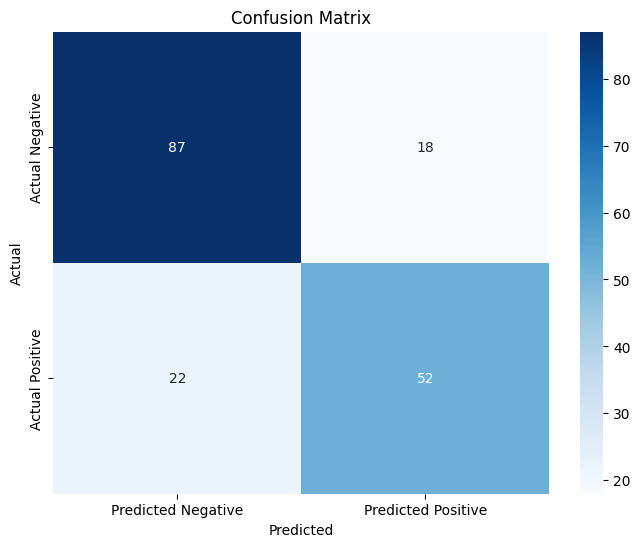

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
